### 빅데이터 과제 - 금융공학 20203868 신재석

1. Download the recent 10 years stock price data have been included in the KOSPI 200 at least once. Then
apply the LASSO method in Lecture 2. You can use the 3 month CD rate as the risk free return.

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as data
import datetime
import time
import scipy.optimize as optm

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### 네이버 금융에서 코스피 200 종목 가져오기

In [2]:
"""
page_list = list(range(21))
page_list.remove(0)

for i in page_list :
    if i == 1 :
            url = "https://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(str(i)) 
            dfs = pd.read_html(url)
            df = np.array(dfs[0].dropna())
            df2 = df.copy()
            print(i)
            continue
    url = "https://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(str(i))
    dfs = pd.read_html(url)
    df = np.array(dfs[0].dropna())
    df2 = np.concatenate([df,df2], axis=0)
    print(i)
"""

'\npage_list = list(range(21))\npage_list.remove(0)\n\nfor i in page_list :\n    if i == 1 :\n            url = "https://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(str(i)) \n            dfs = pd.read_html(url)\n            df = np.array(dfs[0].dropna())\n            df2 = df.copy()\n            print(i)\n            continue\n    url = "https://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(str(i))\n    dfs = pd.read_html(url)\n    df = np.array(dfs[0].dropna())\n    df2 = np.concatenate([df,df2], axis=0)\n    print(i)\n'

In [3]:
"""
KOSPI200_STOCK = pd.DataFrame(df2)
KOSPI200_STOCK.columns = ['종목', ' 현재가', '전일비', '등락률', '거래량', '거래대금(백만)' ,'시가총액(억)']
KOSPI200_STOCK = KOSPI200_STOCK.sort_values(by = '시가총액(억)',
                                            ascending = False).reset_index().drop('index', axis =1 )
"""

"\nKOSPI200_STOCK = pd.DataFrame(df2)\nKOSPI200_STOCK.columns = ['종목', ' 현재가', '전일비', '등락률', '거래량', '거래대금(백만)' ,'시가총액(억)']\nKOSPI200_STOCK = KOSPI200_STOCK.sort_values(by = '시가총액(억)',\n                                            ascending = False).reset_index().drop('index', axis =1 )\n"

In [4]:
"""
# KOSPI 전체 종목 가져오기
KOSPI_ALL = fdr.StockListing('KOSPI')
KOSPI_ALL.head()
"""

"\n# KOSPI 전체 종목 가져오기\nKOSPI_ALL = fdr.StockListing('KOSPI')\nKOSPI_ALL.head()\n"

In [5]:
"""
KOSPI_ALL = KOSPI_ALL.set_index('Name')
KOSPI200_STOCK = KOSPI200_STOCK.set_index('종목')

FIND_TICKER = pd.concat([KOSPI_ALL, 
                         KOSPI200_STOCK], axis =1 ).dropna().sort_values(by = '시가총액(억)', ascending = False)
FIND_TICKER = FIND_TICKER[['Symbol']]
"""

"\nKOSPI_ALL = KOSPI_ALL.set_index('Name')\nKOSPI200_STOCK = KOSPI200_STOCK.set_index('종목')\n\nFIND_TICKER = pd.concat([KOSPI_ALL, \n                         KOSPI200_STOCK], axis =1 ).dropna().sort_values(by = '시가총액(억)', ascending = False)\nFIND_TICKER = FIND_TICKER[['Symbol']]\n"

In [6]:
"""
# ticker가 안찾아진 종목 찾기
tmp = []
for i in range(200) :
    if  KOSPI200_STOCK.index.tolist()[i] not in FIND_TICKER.index.tolist():
        tmp.append(KOSPI200_STOCK.index.tolist()[i])
"""

'\n# ticker가 안찾아진 종목 찾기\ntmp = []\nfor i in range(200) :\n    if  KOSPI200_STOCK.index.tolist()[i] not in FIND_TICKER.index.tolist():\n        tmp.append(KOSPI200_STOCK.index.tolist()[i])\n'

In [7]:
"""
# ticker 찾아줘야하는 종목
tmp
"""

'\n# ticker 찾아줘야하는 종목\ntmp\n'

In [8]:
"""
add_ticker = ['326030', '128940', '078930', '192080', '111770',
              '120110', '161890', '241590','103140', '115390']
ticker_list = FIND_TICKER['Symbol'].tolist()

ticker200 = ticker_list + add_ticker
name200 = FIND_TICKER.index.tolist() + tmp
ticker_dict = dict(zip(name200,ticker200))
"""

"\nadd_ticker = ['326030', '128940', '078930', '192080', '111770',\n              '120110', '161890', '241590','103140', '115390']\nticker_list = FIND_TICKER['Symbol'].tolist()\n\nticker200 = ticker_list + add_ticker\nname200 = FIND_TICKER.index.tolist() + tmp\nticker_dict = dict(zip(name200,ticker200))\n"

In [9]:
"""
# 코스피 200종목 종가 데이터 수집
close = pd.DataFrame()
start = '2010-01-01'
a = []
    
for name,ticker in ticker_dict.items():
    close[name] = fdr.DataReader(ticker, start, '2020-09-16')['Close']
    a.append(name)
    print(len(a))
close.to_excel('KOSPI200_STOCK.xlsx')
"""

"\n# 코스피 200종목 종가 데이터 수집\nclose = pd.DataFrame()\nstart = '2010-01-01'\na = []\n    \nfor name,ticker in ticker_dict.items():\n    close[name] = fdr.DataReader(ticker, start, '2020-09-16')['Close']\n    a.append(name)\n    print(len(a))\nclose.to_excel('KOSPI200_STOCK.xlsx')\n"

In [10]:
# 2010 이후 상장된 종목 제외 -> 총 156개 종목
close = pd.read_excel('KOSPI200_STOCK.xlsx').dropna(axis=1).set_index('Date')

In [11]:
# risk_free_rate data preprocessing
cd_3m = pd.read_excel('./cd_3m.xlsx').dropna()[3:]
cd_3m = cd_3m.reset_index()
cd_3m = cd_3m.drop('index', axis=1)
cd_3m.columns = ['Date', 'rf']
cd_3m['Date'] = pd.to_datetime(cd_3m['Date'].map(lambda x : x.replace('/', '-')))
cd_3m = cd_3m.set_index('Date')
cd_3m = cd_3m = cd_3m['2010-09-16':]
cd_3m_d = cd_3m.applymap(lambda x : (x * 0.01) / 365)

log_ret = close.applymap(lambda x : np.log(x)).diff().dropna()
port_ret = log_ret.sum(axis=1) / 5
port_ret_cut = pd.DataFrame(port_ret)['2010-09-16':]

cd_3m_d['rf'] = pd.concat([cd_3m_d, port_ret], axis = 1)['rf'].dropna()
# 날짜 맞춰주기
cd_3m_d = pd.merge(pd.DataFrame(port_ret), pd.DataFrame(cd_3m_d),
         how = 'left', left_index=True, right_index=True)['rf'].dropna()

(A) Analyze the daily log return data. Use 2 years data for the training set and construct the portfolio
    for the next day. Then, using the window moving, calculate the sharp rate during the 8 years test
    data. Compare the results with the equal weight, market portfolio, plug-in, Shrinkage, Dantzig selector
    methods. Also draw their portfolio value plots.

### 동일비중

In [12]:
# sharp ratio 구하기
# 영업일 2년 기준 standard deviation

std = port_ret.rolling(window = 504).std().dropna()
std_cut = pd.DataFrame(std)['2010-09-16':]

sharp = pd.DataFrame((port_ret - cd_3m_d) / std_cut[0])
sharp_equal = sharp['2012-09-17':]
sharp_equal.columns = ['equal']

log_ret_cut = log_ret['2010-09-16':]

### 데이터 전처리

In [13]:
X = log_ret_cut.copy()[:"2020-09-15"]
X.columns = close.columns.tolist()
Y = port_ret_cut['2010-09-17':]

x_train = X[:'2012-09-13']
x_test = X['2012-09-17':]
y_train = Y[:'2012-09-14']
y_test = Y['2012-09-17':]

###  [LASSO] CROSS VALIDATION을 통한 최적의 LAMDA값 찾기

In [14]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV() #Cross Validation을 통해서 lambda값을 설정한다
lassocv.fit(x_train, y_train)

#Cross Validation을 통해 추출한 최적의 lambda값
lassocv.alpha_ 

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0016443011677843699

### [LASSO] fitting

In [15]:
predictors = x_train.columns

lassoReg = Lasso(alpha=lassocv.alpha_, normalize = True)
lassoReg.fit(x_train, y_train)

# coef 0인 부분 제거
mask = lassoReg.coef_ != 0

select_beta =  dict(zip(X.columns.tolist(), mask.tolist()))

select_beta_name = []
for stock, decision in select_beta.items() :
    if decision == True :
        select_beta_name.append(stock)
        
delete_zero = pd.Series(lassoReg.coef_).map(lambda x : np.nan if x == 0 else x).dropna().tolist()

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


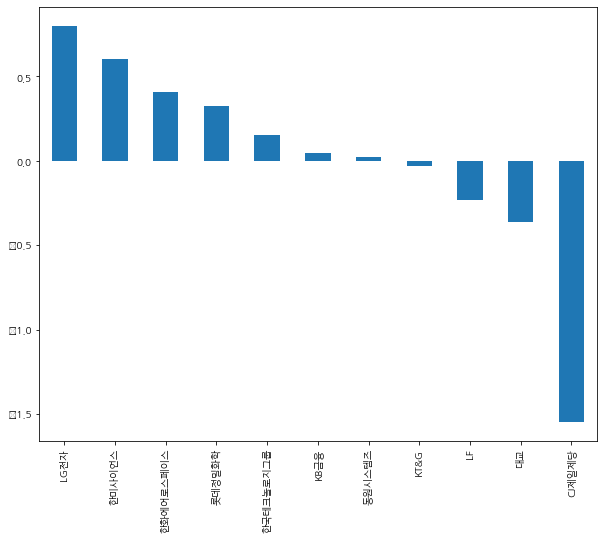

In [16]:
# 베타계수 시각화
plt.rcParams['font.family'] = 'NanumGothic'
coef = pd.Series(delete_zero, select_beta_name).sort_values(ascending = False)
coef.plot(kind = 'bar', figsize = (10,8));
plt.rcParams['font.size'] = 30

In [17]:
# beta 계수 높은 순서대로
coef_df = pd.DataFrame(coef)
coef_df.columns = ['estimated_beta']
coef_df

,estimated_beta
LG전자,0.796708
한미사이언스,0.602193
한화에어로스페이스,0.406600
롯데정밀화학,0.325523
한국테크놀로지그룹,0.152126
KB금융,0.046970
동원시스템즈,0.023618
KT&G,-0.032694
LF,-0.231026
대교,-0.361040


### weight  결정

In [18]:
weight = coef_df.applymap(lambda x : np.nan if x < 0 else x).dropna()
weight['weight'] = coef / coef.sum()

### [LASSO] Sharp Ratio 시각화

In [19]:
lasso_ptf = pd.DataFrame((np.array(log_ret[weight.index.tolist()]) * np.array(weight['weight'])).sum(axis=1))
lasso_ptf.index = log_ret.index
lasso_ptf.columns = ['LASSO']

std_lasso = lasso_ptf.rolling(window = 504).std().dropna()
std_lasso_cut = pd.DataFrame(std_lasso)['2010-09-16':]

sharp_lasso = pd.DataFrame((lasso_ptf['LASSO'] - cd_3m_d) / std_lasso_cut['LASSO'])
sharp_lasso = sharp_lasso['2012-09-17':]
sharp_lasso.columns = ['lasso']

### [Market Portfolio] Sharp Ratio 시각화

In [20]:
"""
# 코스피 인덱스 데이터 수집
start = '2010-01-01'
Kospi_Index = fdr.DataReader('KS11', start, '2020-09-16')['Close']
Kospi_Index.to_excel('Kospi_Index.xlsx')
"""

"\n# 코스피 인덱스 데이터 수집\nstart = '2010-01-01'\nKospi_Index = fdr.DataReader('KS11', start, '2020-09-16')['Close']\nKospi_Index.to_excel('Kospi_Index.xlsx')\n"

In [21]:
Kospi_Index = pd.read_excel('Kospi_Index.xlsx').set_index('Date')
Kospi_Index['Close'] = Kospi_Index['Close'].map(lambda x : np.log(x)).diff().dropna()
sharp_market = Kospi_Index.copy()

std_market = sharp_market.rolling(window = 504).std().dropna()
std_market_cut = pd.DataFrame(std_market)['2010-09-16':]

sharp_market = pd.DataFrame((pd.Series(sharp_market['Close']) - cd_3m_d) / std_market_cut['Close'])
sharp_market = sharp_market['2012-09-17':]
sharp_market = sharp_market['2012-09-17':]
sharp_market.columns = ['Market']

### [Shirinkage (Ridge regression)]  method

In [22]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(normalize= True) #Cross Validation을 통해서 lambda값을 설정한다
ridgecv.fit(x_train, y_train)

#Cross Validation을 통해 추출한 최적의 lambda값
ridgecv.alpha_ 

10.0

In [23]:
ridgeReg = Ridge(alpha=ridgecv.alpha_ , normalize = True)
ridgeReg.fit(x_train, y_train)

# coef 0인 부분 제거 (Ridge라서 제거가 하나도 안됨)
mask = ridgeReg.coef_ != 0

select_beta =  dict(zip(X.columns.tolist(), mask.ravel('c').tolist()))

select_beta_name = []
for stock, decision in select_beta.items() :
    if decision == True :
        select_beta_name.append(stock)
        
delete_zero = pd.Series(ridgeReg.coef_.ravel('c')).map(lambda x : np.nan if x == 0 else x).dropna().tolist()

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


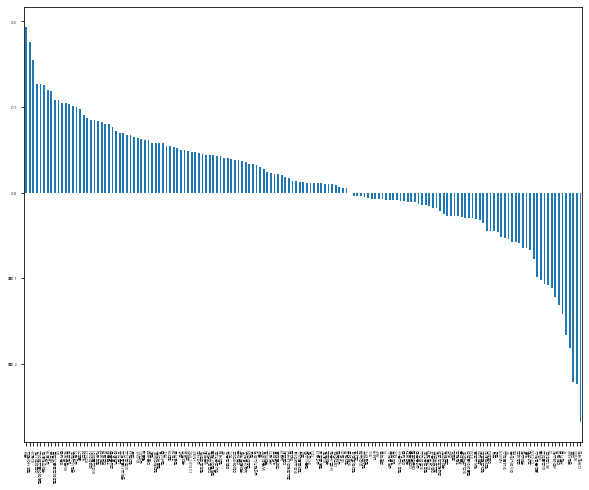

In [24]:
# 베타계수 시각화
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 4
coef = pd.Series(delete_zero, select_beta_name).sort_values(ascending = False)
coef.plot(kind = 'bar', figsize = (10,8));

In [25]:
# beta 계수 높은 순서대로
coef_df = pd.DataFrame(coef)
coef_df.columns = ['estimated_beta']
coef_df

,estimated_beta
동서,0.193429
한미사이언스,0.176034
LG전자,0.155245
아모레퍼시픽,0.127047
한화에어로스페이스,0.126922
...,...
LF,-0.166652
동원F&B,-0.181357
대교,-0.221741
KT&G,-0.223975


In [26]:
weight = coef_df.applymap(lambda x : np.nan if x < 0 else x).dropna()
weight['weight'] = coef / coef.sum()

ridge_ptf = pd.DataFrame((np.array(log_ret[weight.index.tolist()]) * np.array(weight['weight'])).sum(axis=1))
ridge_ptf.index = log_ret.index
ridge_ptf.columns = ['Ridge']

std_ridge = ridge_ptf.rolling(window = 504).std().dropna()
std_ridge_cut = pd.DataFrame(std_ridge)['2010-09-16':]

sharp_ridge = pd.DataFrame((ridge_ptf['Ridge'] - cd_3m_d) / std_ridge_cut['Ridge'])
sharp_ridge = sharp_ridge['2012-09-17':]
sharp_ridge.columns = ['Shrinkage (ridge)']

### plug-in method

In [27]:
mean = np.array(log_ret['2010-09-16': '2012-09-14'].mean(axis=0))
std_plug = mean.std()
X_plug = np.array(log_ret)
num = len(log_ret['2010-09-16': '2012-09-14'])
expand_mean = np.expand_dims(mean, axis=0)
tmp = (X_plug - expand_mean).T
sigma = np.dot(tmp, tmp.T) / (num-1)
sigma_inv = np.linalg.inv(sigma)

weights = np.matmul(((std_plug / np.sqrt(np.matmul(np.matmul(mean.T,sigma_inv),mean))) * sigma_inv),mean)

In [28]:
plug_df = pd.DataFrame()
plug_df['name'] = log_ret.columns.tolist()
plug_df['weight'] = weights.tolist()
plug_df['weight'] = plug_df['weight'].map(lambda x : x if x > 0 else np.nan)
plug_df.dropna(inplace = True)
plug_df['weight']  = plug_df['weight'] / plug_df['weight'].sum()
plug_df = plug_df.sort_values(by = 'weight', ascending = False)

In [29]:
# weight 큰 순서대로 나열
plug_df

,name,weight
0,삼성전자,0.070527
11,기아차,0.052623
44,아모레G,0.040418
141,넥센타이어,0.035355
121,오리온홀딩스,0.034234
...,...,...
24,삼성화재,0.000823
56,DB손해보험,0.000464
84,LS,0.000330
134,HDC,0.000179


In [30]:
# plug-in portfolio 구축
plug_ptf = pd.DataFrame((np.array(log_ret[plug_df['name'].tolist()]) * np.array(plug_df['weight'])).sum(axis=1))

plug_ptf.index = log_ret.index
plug_ptf.columns = ['plugin']

std_plug = plug_ptf.rolling(window = 504).std().dropna()
std_plug_cut = pd.DataFrame(std_plug)['2010-09-16':]

sharp_plug = pd.DataFrame((plug_ptf['plugin'] - cd_3m_d) / std_plug_cut['plugin'])
sharp_plug = sharp_plug['2012-09-17':]
sharp_plug.columns = ['plugin']

### [Dantzig] method

In [31]:
X = np.array(log_ret['2010-09-16': '2012-09-13'])
y = np.array(port_ret['2010-09-17': '2012-09-14'])
bnds = tuple([(-0.99, 0.2)] * X.shape[1])

In [32]:
def obj_func(beta, X, y, lamda):
    return abs(beta).sum()

def cons(beta, X, y, lamda):
    return lamda - max(abs(X.T@(X@beta - y)))

def return_weight(X, y, lamda = 0.01, nlambda = 50, n_iter = 100):
    n, p = X.shape
    beta0 = np.ones((p,1))/p
    
    beta = optm.fmin_slsqp(obj_func, beta0, bounds = bnds, ieqcons=[cons], args=(X, y, lamda), iter = n_iter)
    print(beta)
    
    return beta / beta.sum()

In [33]:
Dantzig_weight = pd.DataFrame(return_weight(X, y))

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 25.97748613548037
            Iterations: 89
            Function evaluations: 14483
            Gradient evaluations: 89
[ 1.47521251e-01 -3.28450973e-01 -1.23536732e-02  1.10740352e-01
 -4.82737925e-01  7.90045062e-02 -7.70669751e-02  4.79433258e-02
 -2.68738265e-01  1.26786675e-01 -4.87307987e-01  1.08373585e-01
 -2.56824781e-01  7.82660339e-02  1.73843748e-01  8.52250492e-03
  8.13151207e-02  1.44058948e-01  1.68477114e-01  1.64702443e-01
  1.15317070e-01 -5.35318539e-01  1.72745694e-01  1.09338817e-01
 -1.17942449e-01 -2.71212407e-01 -5.81781904e-01 -2.38735792e-01
  1.09197036e-01  1.60978432e-01 -5.57634256e-01  6.68459275e-02
  1.77341176e-01  1.57910552e-01  1.72142170e-01  1.60275412e-01
 -8.79419045e-01  1.71769736e-01 -1.11343460e-01 -1.42713924e-01
  1.20264141e-01 -5.37479258e-02  3.47865283e-02 -1.94606487e-02
  4.15302923e-02 -1.58117168e-01  1.39387468e-01  2.28290747e-02
  1.66483

In [34]:
Dant_df = pd.DataFrame()
Dant_df['name'] = log_ret.columns.tolist()
Dant_df['weight'] = Dantzig_weight[0].tolist()
Dant_df['weight'] = Dant_df['weight'].map(lambda x : x if x > 0 else np.nan)
Dant_df.dropna(inplace = True)
Dant_df['weight']  = Dant_df['weight'] / Dant_df['weight'].sum()
Dant_df = Dant_df.sort_values(by = 'weight', ascending = False)

In [35]:
# weight 큰 순서대로 나열
Dant_df

,name,weight
36,CJ제일제당,0.061971
68,CJ,0.047317
151,대교,0.045072
148,LF,0.042970
73,롯데쇼핑,0.042334
...,...,...
50,삼성중공업,0.001112
76,오뚜기,0.001050
57,롯데지주,0.000956
2,NAVER,0.000871


In [36]:
# DantZig portfolio 구축
Dant_ptf = pd.DataFrame((np.array(log_ret[Dant_df['name'].tolist()]) * np.array(Dant_df['weight'])).sum(axis=1))

Dant_ptf.index = log_ret.index
Dant_ptf.columns = ['Dant']

std_dant = Dant_ptf.rolling(window = 504).std().dropna()
std_dant_cut = pd.DataFrame(std_dant)['2010-09-16':]

sharp_dant = pd.DataFrame((Dant_ptf['Dant'] - cd_3m_d) / std_dant_cut['Dant'])
sharp_dant = sharp_dant['2012-09-17':]
sharp_dant.columns = ['DantZig']

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


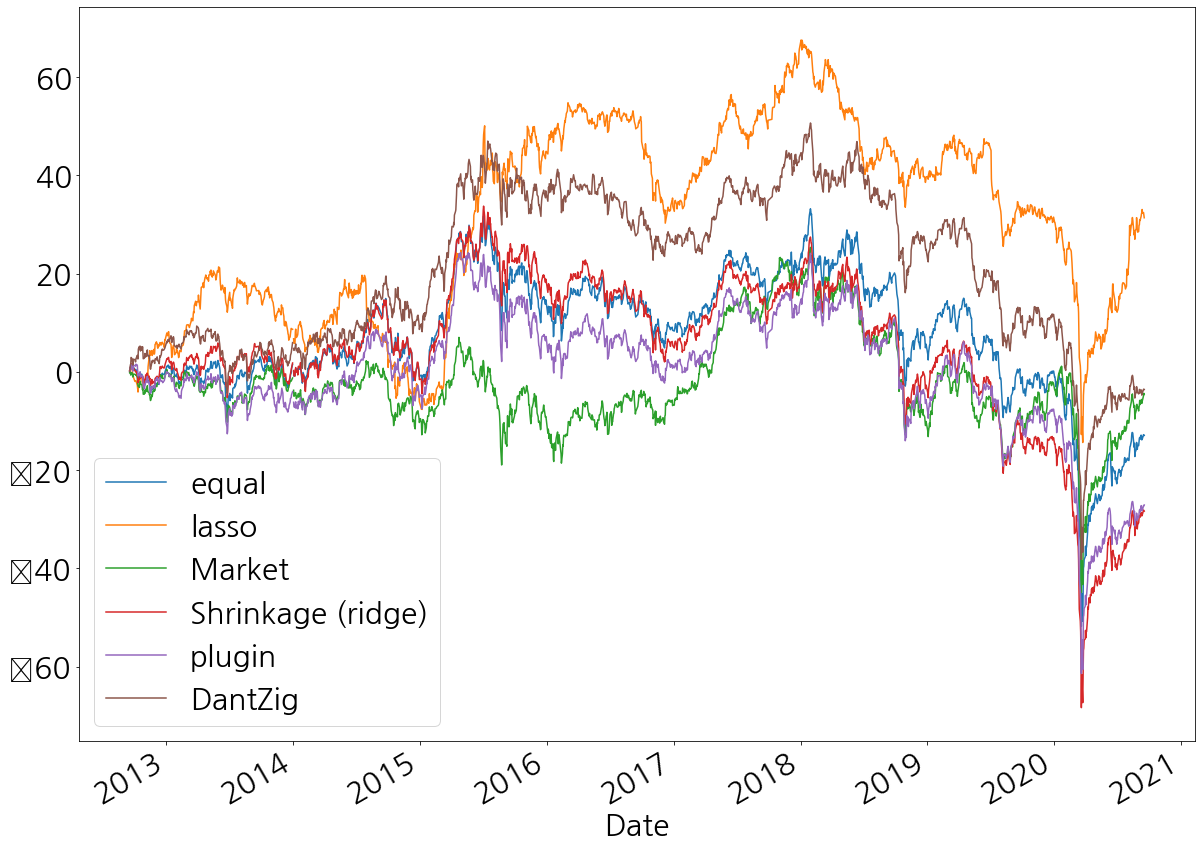

In [37]:
plt.rcParams['font.size'] = 30
pd.concat([sharp_equal.cumsum(), sharp_lasso.cumsum(), sharp_market.cumsum(), 
           sharp_ridge.cumsum(), sharp_plug.cumsum(), sharp_dant.cumsum()], axis=1).plot(figsize = (20,15))

# (b) Conduct the same analysis for the weekly data. Use the 4 years data for the training set.

In [38]:
# 2010 이후 상장된 종목 제외 -> 총 156개 종목
close = pd.read_excel('KOSPI200_STOCK.xlsx').dropna(axis=1).set_index('Date')

In [39]:
# 주단위 데이터로 변환
close_w = close.assign(Date = close.index).resample('w').first().set_index('Date')
tmp_sum = pd.DataFrame(cd_3m_d).assign(Date = cd_3m_d.index).resample('w').sum()

cd_3m_w = pd.DataFrame()
cd_3m_w['Date'] = pd.DataFrame(cd_3m_d).assign(Date = cd_3m_d.index).resample('w').first().set_index('Date').index
cd_3m_w['rf'] = tmp_sum['rf'].tolist()
cd_3m_w.set_index('Date', inplace =True)

log_ret_w = close_w.applymap(lambda x : np.log(x)).diff().dropna()
port_ret_w = log_ret_w.sum(axis=1) / 5
port_ret_cut_w = pd.DataFrame(port_ret_w)['2014-09-15':]

### Eqaul Weight

In [40]:
# sharp ratio 구하기
# 영업일 2년 기준 standard deviation

std_w = port_ret_w.rolling(window = 208).std().dropna()
std_cut_w = pd.DataFrame(std_w)['2014-09-15':]

sharp_w = pd.DataFrame((port_ret_w - cd_3m_w['rf']) / std_cut_w[0])
sharp_equal_w = sharp_w['2014-09-15':]
sharp_equal_w.columns = ['equal']

log_ret_cut_w = log_ret_w['2010-09-13':]

### [LASSO] fitting

In [41]:
# training period - '2010-09-13 ~ 2014-09-11'
# test period - '2014-09-15 ~ 2020-09-14'
X = log_ret_cut_w.copy()[:"2020-09-14"]
Y = port_ret_w['2010-09-20':]

x_train = X[:'2014-09-01']
x_test = X['2014-09-15':]
y_train = Y[:'2014-09-11']
y_test = Y['2014-09-15':]

In [42]:
predictors = x_train.columns

lassoReg = Lasso(alpha=0.003, normalize = True)
lassoReg.fit(x_train, y_train)

# coef 0인 부분 제거
mask = lassoReg.coef_ != 0

select_beta =  dict(zip(X.columns.tolist(), mask.tolist()))

select_beta_name = []
for stock, decision in select_beta.items() :
    if decision == True :
        select_beta_name.append(stock)
        
delete_zero = pd.Series(lassoReg.coef_).map(lambda x : np.nan if x == 0 else x).dropna().tolist()

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


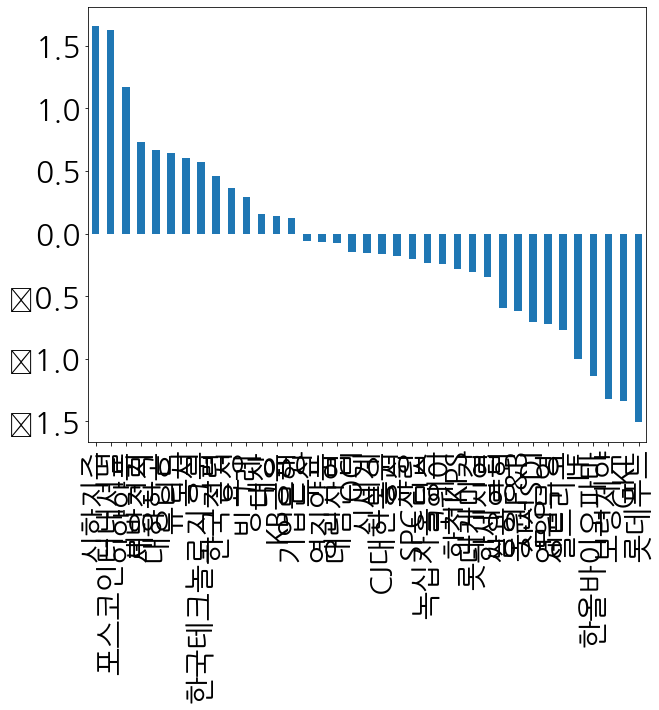

In [43]:
# 베타계수 시각화
plt.rcParams['font.family'] = 'NanumGothic'
coef = pd.Series(delete_zero, select_beta_name).sort_values(ascending = False)
coef.plot(kind = 'bar', figsize = (10,8));
plt.rcParams['font.size'] = 13

In [44]:
# beta 계수 높은 순서대로
coef_df = pd.DataFrame(coef)
coef_df.columns = ['estimated_beta']
coef_df

,estimated_beta
신한지주,1.654589
포스코인터내셔널,1.622906
일양약품,1.174710
세방전지,0.729451
대한항공,0.664633
유니드,0.640234
동서,0.603041
한국테크놀로지그룹,0.575136
한국전력,0.462333
효성,0.366187


In [45]:
weight = coef_df.applymap(lambda x : np.nan if x < 0 else x).dropna()
weight['weight'] = coef / coef.sum()

In [46]:
lasso_ptf = pd.DataFrame((np.array(log_ret_w[weight.index.tolist()]) * np.array(weight['weight'])).sum(axis=1))
lasso_ptf.index = log_ret_w.index
lasso_ptf.columns = ['LASSO']

std_lasso = lasso_ptf.rolling(window = 208).std().dropna()
std_lasso_cut = pd.DataFrame(std_lasso)['2010-09-13':]

sharp_lasso_w = pd.DataFrame((lasso_ptf['LASSO'] - cd_3m_w['rf']) / std_lasso_cut['LASSO'])
sharp_lasso_w = sharp_lasso_w['2014-09-15':]
sharp_lasso_w.columns = ['lasso']

### [Market Portfoilo] Sharp Ratio 시각화

In [47]:
Kospi_Index = pd.read_excel('Kospi_Index.xlsx').set_index('Date')
Kospi_Index_w = Kospi_Index.assign(Date = Kospi_Index.index).resample('w').first().set_index('Date')
Kospi_Index_w['Close'] = Kospi_Index_w['Close'].map(lambda x : np.log(x)).diff().dropna()
sharp_market_w = Kospi_Index_w.copy().dropna()

std_market_w = sharp_market_w.rolling(window = 208).std().dropna()
std_market_cut_w = pd.DataFrame(std_market_w)['2010-09-16':]
sharp_market_w = pd.DataFrame((sharp_market_w['Close'] - cd_3m_w['rf']) / std_market_cut_w['Close'])
sharp_market_w.columns = ['Market']

### [Shrinkage (Ridge regression) ] method

In [48]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(normalize= True) #Cross Validation을 통해서 lambda값을 설정한다
ridgecv.fit(x_train, y_train)

#Cross Validation을 통해 추출한 최적의 lambda값
ridgecv.alpha_ 

10.0

In [49]:
ridgeReg = Ridge(alpha=ridgecv.alpha_ , normalize = True)
ridgeReg.fit(x_train, y_train)

# coef 0인 부분 제거 (Ridge라서 제거가 하나도 안됨)
mask = ridgeReg.coef_ != 0

select_beta =  dict(zip(X.columns.tolist(), mask.ravel('c').tolist()))

select_beta_name = []
for stock, decision in select_beta.items() :
    if decision == True :
        select_beta_name.append(stock)
        
delete_zero = pd.Series(ridgeReg.coef_.ravel('c')).map(lambda x : np.nan if x == 0 else x).dropna().tolist()

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


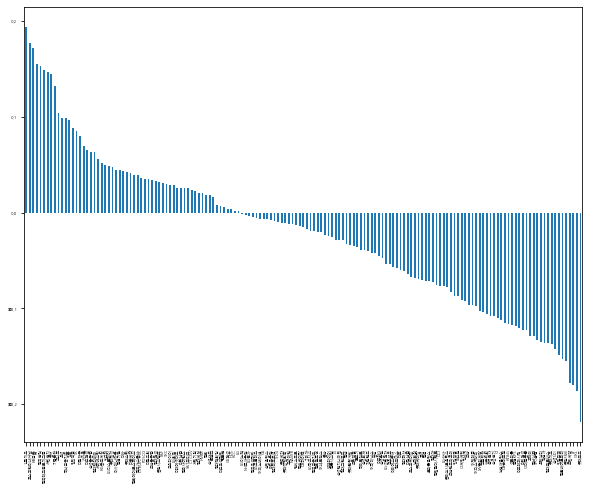

In [50]:
# 베타계수 시각화
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 4
coef = pd.Series(delete_zero, select_beta_name).sort_values(ascending = False)
coef.plot(kind = 'bar', figsize = (10,8));

In [51]:
# beta 계수 높은 순서대로
coef_df = pd.DataFrame(coef)
coef_df.columns = ['estimated_beta']
coef_df

,estimated_beta
신한지주,0.193777
포스코인터내셔널,0.176958
KB금융,0.171323
KT,0.155522
한국전력,0.153332
...,...
동원F&B,-0.155321
보령제약,-0.178173
LF,-0.179633
GKL,-0.186117


In [52]:
lasso_ptf = pd.DataFrame((np.array(log_ret_w[weight.index.tolist()]) * np.array(weight['weight'])).sum(axis=1))
lasso_ptf.index = log_ret_w.index
lasso_ptf.columns = ['LASSO']

std_lasso = lasso_ptf.rolling(window = 208).std().dropna()
std_lasso_cut = pd.DataFrame(std_lasso)['2010-09-13':]

sharp_lasso_w = pd.DataFrame((lasso_ptf['LASSO'] - cd_3m_w['rf']) / std_lasso_cut['LASSO'])
sharp_lasso_w = sharp_lasso_w['2014-09-15':]
sharp_lasso_w.columns = ['lasso']

In [53]:
weight = coef_df.applymap(lambda x : np.nan if x < 0 else x).dropna()
weight['weight'] = coef / coef.sum()

ridge_ptf = pd.DataFrame((np.array(log_ret_w[weight.index.tolist()]) * np.array(weight['weight'])).sum(axis=1))
ridge_ptf.index = log_ret_w.index
ridge_ptf.columns = ['Ridge']

std_ridge = ridge_ptf.rolling(window = 208).std().dropna()
std_ridge_cut = pd.DataFrame(std_ridge)['2010-09-13':]

sharp_ridge_w = pd.DataFrame((ridge_ptf['Ridge'] - cd_3m_w['rf']) / std_ridge_cut['Ridge'])
sharp_ridge_w = sharp_ridge_w['2014-09-15':]
sharp_ridge_w.columns = ['Shrinkage (ridge)']

### [Plug-in] Method

In [54]:
# training period - '2010-09-13 ~ 2014-09-11'
# test period - '2014-09-15 ~ 2020-09-14'

In [55]:
mean_w = np.array(log_ret_w['2010-09-13': '2014-09-11'].mean(axis=0))
std_plug = mean_w.std()
X_plug = np.array(log_ret_w)
num = len(log_ret_w['2010-09-16': '2012-09-14'])
expand_mean = np.expand_dims(mean_w, axis=0)
tmp = (X_plug - expand_mean).T
sigma = np.dot(tmp, tmp.T) / (num-1)
sigma_inv = np.linalg.inv(sigma)

weights = np.matmul(((std_plug / np.sqrt(np.matmul(np.matmul(mean_w.T,sigma_inv),mean_w))) * sigma_inv),mean_w)

In [56]:
plug_df = pd.DataFrame()
plug_df['name'] = log_ret_w.columns.tolist()
plug_df['weight'] = weights.tolist()
plug_df['weight'] = plug_df['weight'].map(lambda x : x if x > 0 else np.nan)
plug_df.dropna(inplace = True)
plug_df['weight']  = plug_df['weight'] / plug_df['weight'].sum()
plug_df = plug_df.sort_values(by = 'weight', ascending = False)

# weight 큰 순서대로 나열
plug_df

,name,weight
74,메리츠증권,0.043531
11,기아차,0.038786
10,SK텔레콤,0.033755
44,아모레G,0.033629
0,삼성전자,0.033136
...,...,...
64,삼성증권,0.000606
119,휴켐스,0.000498
65,NH투자증권,0.000241
145,유니드,0.000230


In [57]:
# training period - '2010-09-13 ~ 2014-09-11'
# test period - '2014-09-15 ~ 2020-09-14'

In [58]:
# plug-in portfolio 구축
plug_ptf = pd.DataFrame((np.array(log_ret_w[plug_df['name'].tolist()]) * np.array(plug_df['weight'])).sum(axis=1))

plug_ptf.index = log_ret_w.index
plug_ptf.columns = ['plugin']

std_plug = plug_ptf.rolling(window = 208).std().dropna()
std_plug_cut = pd.DataFrame(std_plug)['2010-09-16':]

sharp_plug_w = pd.DataFrame((plug_ptf['plugin'] - cd_3m_w['rf']) / std_plug_cut['plugin'])
sharp_plug_w = sharp_plug['2014-09-15':]
sharp_plug_w.columns = ['plugin']

### [Dant_Zig] method

In [59]:
# training period - '2010-09-13 ~ 2014-09-11'
# test period - '2014-09-15 ~ 2020-09-14'

In [60]:
X = np.array(log_ret_w['2010-09-13': '2014-09-01'])
y = np.array(port_ret_w['2010-09-20': '2014-09-11'])
bnds = tuple([(-0.99, 0.2)] * X.shape[1])

In [61]:
def obj_func(beta, X, y, lamda):
    return abs(beta).sum()

def cons(beta, X, y, lamda):
    return lamda - max(abs(X.T@(X@beta - y)))

def return_weight(X, y, lamda = 0.01, nlambda = 50, n_iter = 100):
    n, p = X.shape
    beta0 = np.ones((p,1))/p
    
    beta = optm.fmin_slsqp(obj_func, beta0, bounds = bnds, ieqcons=[cons], args=(X, y, lamda), iter = n_iter)
    print(beta)
    
    return beta / beta.sum()

In [62]:
Dantzig_weight = pd.DataFrame(return_weight(X, y))

Dant_df = pd.DataFrame()
Dant_df['name'] = log_ret_w.columns.tolist()
Dant_df['weight'] = Dantzig_weight[0].tolist()
Dant_df['weight'] = Dant_df['weight'].map(lambda x : x if x > 0 else np.nan)
Dant_df.dropna(inplace = True)
Dant_df['weight']  = Dant_df['weight'] / Dant_df['weight'].sum()
Dant_df = Dant_df.sort_values(by = 'weight', ascending = False)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.17253303047960186
            Iterations: 101
            Function evaluations: 16340
            Gradient evaluations: 101
[ 6.62045428e-04  1.30808527e-05 -2.45932403e-04 -3.34165427e-04
 -2.15493091e-04  2.65158901e-04  5.99051423e-04 -4.16040227e-05
  1.08781035e-04 -4.89973558e-05 -4.17565017e-04 -5.28650270e-06
  2.40791534e-04 -1.42509435e-04 -3.14682133e-03 -1.28809832e-05
 -3.06308806e-04 -2.10664377e-04 -3.14591467e-04  9.60392879e-05
  4.00910098e-05  1.12507504e-04 -1.20244889e-04  1.36189449e-04
 -1.04254662e-04  6.77321197e-05  6.22878248e-06 -2.09883069e-05
 -1.01146617e-03 -3.64886976e-03 -1.22573238e-04  5.12913466e-05
 -1.59580771e-05 -3.90939027e-05 -2.86962113e-05 -4.98781773e-04
 -7.55943127e-05 -2.80250374e-04 -5.31837309e-05 -7.81136803e-05
  6.60970705e-04  2.58568863e-05 -6.47548819e-05 -2.11294429e-04
  8.67728453e-05 -6.97976297e-03  6.17315322e-05  9.94490664e-05
 -2.05808256e-04

In [63]:
# weight 큰 순서대로 나열
Dant_df

,name,weight
83,한올바이오파마,0.154408
88,영진약품,0.140176
85,팬오션,0.134265
96,OCI,0.126978
91,일양약품,0.125300
...,...,...
107,한전KPS,0.000034
11,기아차,0.000032
145,유니드,0.000014
118,아시아나항공,0.000010


In [64]:
# DantZig portfolio 구축
Dant_ptf = pd.DataFrame((np.array(log_ret_w[Dant_df['name'].tolist()]) * np.array(Dant_df['weight'])).sum(axis=1))

Dant_ptf.index = log_ret_w.index
Dant_ptf.columns = ['Dant']

In [65]:
std_dant_w = Dant_ptf.rolling(window = 208).std().dropna()
std_dant_cut_w = pd.DataFrame(std_dant_w)['2010-09-16':]

sharp_dant_w = pd.DataFrame((Dant_ptf['Dant'] - cd_3m_w['rf']) / std_dant_cut_w['Dant'])
sharp_dant_w = sharp_dant_w['2014-09-15':]
sharp_dant_w.columns = ['DantZig']

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


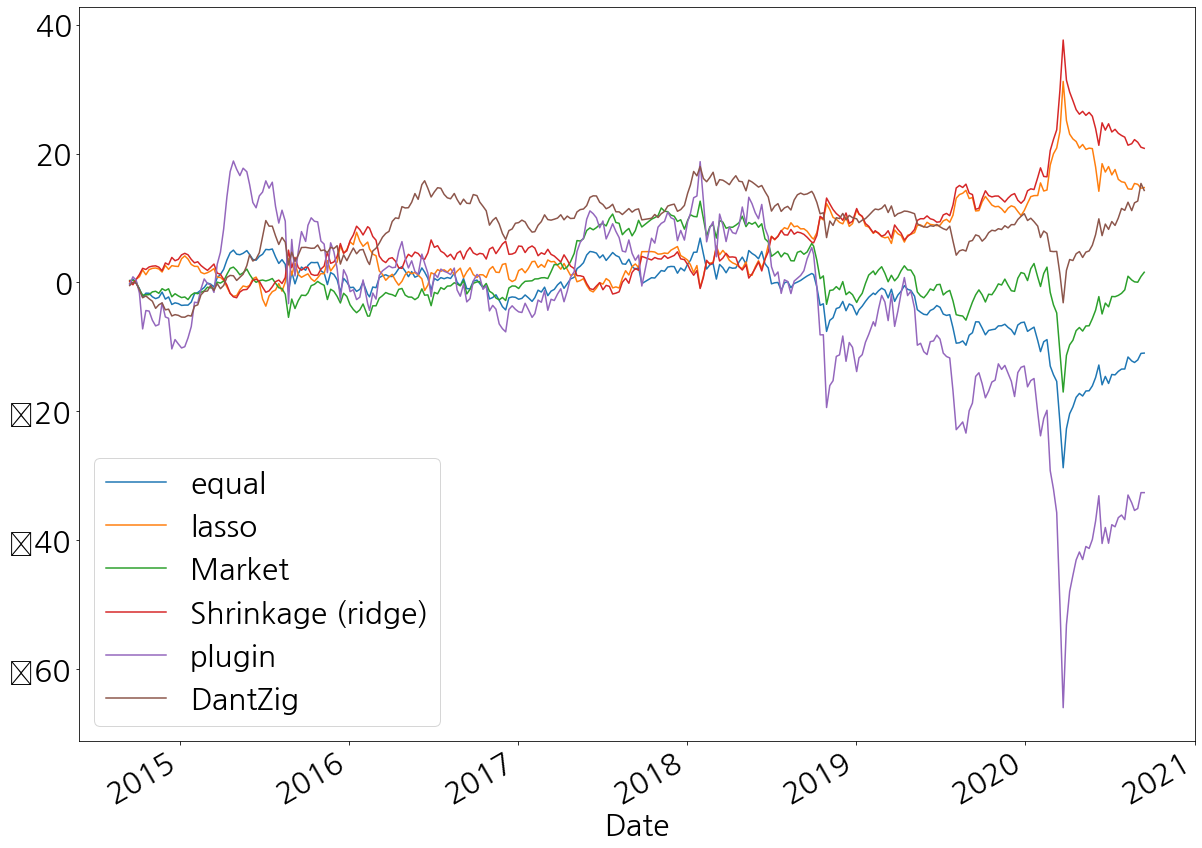

In [66]:
plt.rcParams['font.size'] = 30
pd.concat([sharp_equal_w.cumsum(), sharp_lasso_w.cumsum(),
          sharp_market_w.cumsum(), sharp_ridge_w.cumsum(),
          sharp_plug_w.cumsum(), sharp_dant_w.cumsum()], axis=1).dropna().plot(figsize = (20,15))

# 2번문제

2. Find the LASSO model to explain the KOSPI 200 index return (monthly data for 20 years). You can use
some macro factors and market information such as the exchange rate, oil price, GDP, and other factors.
Include at least 30 factors (you can use any variables). Then apply the LASSO method.

### 각종 지수 및 환율 데이터수집

In [67]:
"""
KOSPI200 = data.DataReader('^KS11', 'yahoo', '2000') # KOSPI 200
DOW = data.DataReader('^DJI', 'yahoo', '2000') # 다우존스
SP500 = data.DataReader('^GSPC', 'yahoo', '2000') # S&P 500
NASDAQ = fdr.DataReader('IXIC','2000') # 나스닥
SP500VIX = fdr.DataReader('VIX','2000') # S&P 500 VIX
RUSSELL = data.DataReader('^RUT', 'yahoo', '2000') # RUSSELL 2000
NIKKEY200 = data.DataReader('^N225', 'yahoo', '2000') # 닛케이200
USBOND10Y = data.DataReader('^TNX', 'yahoo', '2000') # 미국국채10년
USDKRW = fdr.DataReader('USD/KRW', '2000') # 원달러 환율
CNYKRW = fdr.DataReader('CNY/KRW','2000') # 원위안화 환율
JPYKRW = fdr.DataReader('JPY/KRW','2000') # 원엔화 환율
EURUSD = fdr.DataReader('EUR/USD','2000') # 유로달러 환율
USDJPY = fdr.DataReader('USD/JPY','2000') # 달러엔 환율
CAC = fdr.DataReader('CAC','2000') # FRANCE CAC 40
HSI = data.DataReader('^HSI', 'yahoo', '2000') # HONGKONG HANG SENG
SAMSUNG = fdr.DataReader('005930','2000') # 삼성전자
"""

"\nKOSPI200 = data.DataReader('^KS11', 'yahoo', '2000') # KOSPI 200\nDOW = data.DataReader('^DJI', 'yahoo', '2000') # 다우존스\nSP500 = data.DataReader('^GSPC', 'yahoo', '2000') # S&P 500\nNASDAQ = fdr.DataReader('IXIC','2000') # 나스닥\nSP500VIX = fdr.DataReader('VIX','2000') # S&P 500 VIX\nRUSSELL = data.DataReader('^RUT', 'yahoo', '2000') # RUSSELL 2000\nNIKKEY200 = data.DataReader('^N225', 'yahoo', '2000') # 닛케이200\nUSBOND10Y = data.DataReader('^TNX', 'yahoo', '2000') # 미국국채10년\nUSDKRW = fdr.DataReader('USD/KRW', '2000') # 원달러 환율\nCNYKRW = fdr.DataReader('CNY/KRW','2000') # 원위안화 환율\nJPYKRW = fdr.DataReader('JPY/KRW','2000') # 원엔화 환율\nEURUSD = fdr.DataReader('EUR/USD','2000') # 유로달러 환율\nUSDJPY = fdr.DataReader('USD/JPY','2000') # 달러엔 환율\nCAC = fdr.DataReader('CAC','2000') # FRANCE CAC 40\nHSI = data.DataReader('^HSI', 'yahoo', '2000') # HONGKONG HANG SENG\nSAMSUNG = fdr.DataReader('005930','2000') # 삼성전자\n"

In [68]:
"""
KOSPI200.to_excel("KOSPI200.xlsx")
DOW.to_excel("DOW.xlsx")
SP500.to_excel("SP500.xlsx")
NASDAQ.to_excel("NASDAQ.xlsx")
RUSSELL.to_excel("RUSSELL.xlsx")
SP500VIX.to_excel("SP500VIX.xlsx")
NIKKEY200.to_excel("NIKKEY200.xlsx")
USBOND10Y.to_excel("USBOND10Y.xlsx")
CNYKRW.to_excel("CNYKRW.xlsx")
JPYKRW.to_excel("JPYKRW.xlsx")
EURUSD.to_excel("EURUSD.xlsx")
USDJPY.to_excel("USDJPY.xlsx")
CAC.to_excel("CAC.xlsx")
HSI.to_excel("HSI.xlsx")
SAMSUNG.to_excel("SAMSUNG.xlsx")
"""

'\nKOSPI200.to_excel("KOSPI200.xlsx")\nDOW.to_excel("DOW.xlsx")\nSP500.to_excel("SP500.xlsx")\nNASDAQ.to_excel("NASDAQ.xlsx")\nRUSSELL.to_excel("RUSSELL.xlsx")\nSP500VIX.to_excel("SP500VIX.xlsx")\nNIKKEY200.to_excel("NIKKEY200.xlsx")\nUSBOND10Y.to_excel("USBOND10Y.xlsx")\nCNYKRW.to_excel("CNYKRW.xlsx")\nJPYKRW.to_excel("JPYKRW.xlsx")\nEURUSD.to_excel("EURUSD.xlsx")\nUSDJPY.to_excel("USDJPY.xlsx")\nCAC.to_excel("CAC.xlsx")\nHSI.to_excel("HSI.xlsx")\nSAMSUNG.to_excel("SAMSUNG.xlsx")\n'

### 투자주체별 순매수 데이터 가져온 후 전처리

In [69]:
"""
page_list = list(range(390))
page_list.remove(0)
page_list = page_list[::-1]

for i in page_list :
    if i == 389 :
            url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200918&sosok=&page={}".format(str(i)) 
            dfs = pd.read_html(url)
            df = np.array(dfs[0].dropna())
            df2 = df.copy()
            print(i)
            continue
    url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200918&sosok=&page={}".format(str(i))
    dfs = pd.read_html(url)
    df = np.array(dfs[0].dropna())
    df2 = np.concatenate([df,df2], axis=0)
    print(i)
"""

'\npage_list = list(range(390))\npage_list.remove(0)\npage_list = page_list[::-1]\n\nfor i in page_list :\n    if i == 389 :\n            url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200918&sosok=&page={}".format(str(i)) \n            dfs = pd.read_html(url)\n            df = np.array(dfs[0].dropna())\n            df2 = df.copy()\n            print(i)\n            continue\n    url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200918&sosok=&page={}".format(str(i))\n    dfs = pd.read_html(url)\n    df = np.array(dfs[0].dropna())\n    df2 = np.concatenate([df,df2], axis=0)\n    print(i)\n'

In [70]:
"""
NETBUY = pd.DataFrame(df2)
NETBUY.columns = ['날짜', '개인', '외국인', '기관계', '금융투자', '보험',
               '투신(사모)', '은행', '기타금융기관', '연기금등', '기타법인']
NETBUY['날짜'] = NETBUY['날짜'].map(lambda x : pd.to_datetime('20' + str(x)))
NETBUY = NETBUY.set_index('날짜')
NETBUY = NETBUY.drop('기관계', axis=1)
NETBUY = NETBUY[::-1]

NETBUY.to_excel('./NETBUY.xlsx')
"""

"\nNETBUY = pd.DataFrame(df2)\nNETBUY.columns = ['날짜', '개인', '외국인', '기관계', '금융투자', '보험',\n               '투신(사모)', '은행', '기타금융기관', '연기금등', '기타법인']\nNETBUY['날짜'] = NETBUY['날짜'].map(lambda x : pd.to_datetime('20' + str(x)))\nNETBUY = NETBUY.set_index('날짜')\nNETBUY = NETBUY.drop('기관계', axis=1)\nNETBUY = NETBUY[::-1]\n\nNETBUY.to_excel('./NETBUY.xlsx')\n"

In [71]:
"""
NETBUY = pd.read_excel('./NETBUY.xlsx')
Imput_2 = NETBUY.copy()
Imput_3 = Imput_2.reset_index().drop('날짜', axis=1)

# Interpolate를 통해 결측 5년치를 채워넣기 위해 중간에 결측치 넣는 과정 
zeros = np.zeros(shape=9,)

for i in range(3889):
    if i == 0 :        
        make_imput = np.array(Imput_3.loc[i,:])
    if i % 3 == 0 :
        tmp = np.array(Imput_3.loc[i,:])
        make_imput = np.vstack([make_imput, tmp, zeros])
    else:
        tmp = np.array(Imput_3.loc[i,:])
        make_imput = np.vstack([make_imput, tmp])
        
make_imput_2 = pd.DataFrame(make_imput).applymap(lambda x : np.nan if x == 0 else float(x))
make_imput_2 = make_imput_2.interpolate('linear')

KOSPI200 = pd.read_excel("KOSPI200.xlsx")
KOSPI200 = KOSPI200[['Date','Close']]
KOSPI200['Date'] = pd.to_datetime(KOSPI200.Date)
KOSPI200.set_index('Date',inplace=True)
"""

'\nNETBUY = pd.read_excel(\'./NETBUY.xlsx\')\nImput_2 = NETBUY.copy()\nImput_3 = Imput_2.reset_index().drop(\'날짜\', axis=1)\n\n# Interpolate를 통해 결측 5년치를 채워넣기 위해 중간에 결측치 넣는 과정 \nzeros = np.zeros(shape=9,)\n\nfor i in range(3889):\n    if i == 0 :        \n        make_imput = np.array(Imput_3.loc[i,:])\n    if i % 3 == 0 :\n        tmp = np.array(Imput_3.loc[i,:])\n        make_imput = np.vstack([make_imput, tmp, zeros])\n    else:\n        tmp = np.array(Imput_3.loc[i,:])\n        make_imput = np.vstack([make_imput, tmp])\n        \nmake_imput_2 = pd.DataFrame(make_imput).applymap(lambda x : np.nan if x == 0 else float(x))\nmake_imput_2 = make_imput_2.interpolate(\'linear\')\n\nKOSPI200 = pd.read_excel("KOSPI200.xlsx")\nKOSPI200 = KOSPI200[[\'Date\',\'Close\']]\nKOSPI200[\'Date\'] = pd.to_datetime(KOSPI200.Date)\nKOSPI200.set_index(\'Date\',inplace=True)\n'

In [72]:
"""
# 중간 row 반복적으로 제거하여 kodex 200과 row 및 날짜기준 맞춰주기
for i in range(0,5187,60) :
    make_imput_2 = make_imput_2.drop(i)
    
make_imput_2[9] = KOSPI200.index.tolist()[:-1]
make_imput_2.columns =  ['개인', '외국인', '금융투자', '보험', '투신(사모)',
                         '은행', '기타금융기관', '연기금등', '기타법인', '날짜']
make_imput_2 = make_imput_2.set_index('날짜')[:-1].dropna(axis=1)
NETBUYING = make_imput_2.resample('BM').sum()[:-1]
NETBUYING.to_excel('./NETBUYING.xlsx')
"""

"\n# 중간 row 반복적으로 제거하여 kodex 200과 row 및 날짜기준 맞춰주기\nfor i in range(0,5187,60) :\n    make_imput_2 = make_imput_2.drop(i)\n    \nmake_imput_2[9] = KOSPI200.index.tolist()[:-1]\nmake_imput_2.columns =  ['개인', '외국인', '금융투자', '보험', '투신(사모)',\n                         '은행', '기타금융기관', '연기금등', '기타법인', '날짜']\nmake_imput_2 = make_imput_2.set_index('날짜')[:-1].dropna(axis=1)\nNETBUYING = make_imput_2.resample('BM').sum()[:-1]\nNETBUYING.to_excel('./NETBUYING.xlsx')\n"

In [73]:
# 투자자별 순매수 가져오기
NETBUYING = pd.read_excel('NETBUYING.xlsx')

### 각종 지수 및 환율 데이터 읽어오기

In [74]:
KOSPI200 = pd.read_excel("KOSPI200.xlsx")
DOW = pd.read_excel("DOW.xlsx")
SP500 = pd.read_excel("SP500.xlsx")
NASDAQ = pd.read_excel("NASDAQ.xlsx")
RUSSELL = pd.read_excel("RUSSELL.xlsx")
SP500VIX= pd.read_excel("SP500VIX.xlsx")
NIKKEY200 = pd.read_excel("NIKKEY200.xlsx")
CAC = pd.read_excel("CAC.xlsx")
HSI = pd.read_excel("HSI.xlsx")
USBOND10Y = pd.read_excel("USBOND10Y.xlsx")
CNYKRW = pd.read_excel("CNYKRW.xlsx")
JPYKRW = pd.read_excel("JPYKRW.xlsx")
EURUSD = pd.read_excel("EURUSD.xlsx")
USDJPY = pd.read_excel("USDJPY.xlsx")
SAMSUNG = pd.read_excel("SAMSUNG.xlsx")

In [75]:
KOSPI200 = KOSPI200[['Date','Close']]
DOW = DOW[['Date','Close']]
SP500 = SP500[['Date','Close']]
NASDAQ = NASDAQ[['Date','Close']]
RUSSELL = RUSSELL[['Date','Close']]
SP500VIX = SP500VIX[['Date','Close']]
NIKKEY200 = NIKKEY200[['Date','Close']]
CAC = CAC[['Date','Close']]
HSI = HSI[['Date','Close']]
USBOND10Y = USBOND10Y[['Date','Close']]
CNYKRW = CNYKRW[['Date','Close']]
JPYKRW = JPYKRW[['Date','Close']]
EURUSD = EURUSD[['Date','Close']]
USDJPY = USDJPY[['Date','Close']]
SAMSUNG = SAMSUNG[['Date','Close']]

In [76]:
KOSPI200['Date'] = pd.to_datetime(KOSPI200.Date)
DOW['Date'] =  pd.to_datetime(DOW.Date)
SP500['Date'] =  pd.to_datetime(SP500.Date)
NASDAQ['Date'] = pd.to_datetime(NASDAQ.Date)
RUSSELL['Date'] = pd.to_datetime(RUSSELL.Date)
CAC = CAC[['Date','Close']]
HSI = HSI[['Date','Close']]
SP500VIX['Date'] = pd.to_datetime(SP500VIX.Date)
NIKKEY200['Date'] = pd.to_datetime(NIKKEY200.Date)
USBOND10Y['Date'] = pd.to_datetime(USBOND10Y.Date)
CNYKRW['Date'] = pd.to_datetime(CNYKRW.Date)
JPYKRW['Date'] = pd.to_datetime(JPYKRW.Date)
EURUSD['Date'] = pd.to_datetime(EURUSD.Date)
USDJPY['Date'] = pd.to_datetime(USDJPY.Date)
SAMSUNG['Date'] = pd.to_datetime(SAMSUNG.Date)

In [77]:
KOSPI200.set_index('Date',inplace=True)
DOW.set_index('Date',inplace=True)
SP500.set_index('Date',inplace=True)
NASDAQ.set_index('Date',inplace=True)
RUSSELL.set_index('Date',inplace=True)
SP500VIX.set_index('Date',inplace=True)
NIKKEY200.set_index('Date',inplace=True)
CAC.set_index('Date',inplace=True)
HSI.set_index('Date',inplace=True)
USBOND10Y.set_index('Date',inplace=True)
CNYKRW.set_index('Date',inplace=True)
JPYKRW.set_index('Date',inplace=True)
EURUSD.set_index('Date',inplace=True)
USDJPY.set_index('Date',inplace=True)
SAMSUNG.set_index('Date',inplace=True)

In [78]:
KOSPI200 = KOSPI200.resample('BM').last()
DOW =  DOW.resample('BM').last()
SP500 =  SP500.resample('BM').last()
NASDAQ = NASDAQ.resample('BM').last()
RUSSELL = RUSSELL.resample('BM').last()
SP500VIX = SP500VIX.resample('BM').last()
NIKKEY200 = NIKKEY200.resample('BM').last()
CAC = CAC.resample('BM').last()
HSI = HSI.resample('BM').last()
USBOND10Y = USBOND10Y.resample('BM').last()
CNYKRW = CNYKRW.resample('BM').last()
JPYKRW = JPYKRW.resample('BM').last()
EURUSD = EURUSD.resample('BM').last()
USDJPY = USDJPY.resample('BM').last()
SAMSUNG = SAMSUNG.resample('BM').last()

### 한국경제통계시스템 데이터 전처리

In [79]:
GDP_GROWTH = pd.read_excel('경제성장률_GDP.xls',skiprows=2,skipfooter=3,index_col='Unnamed: 0').T # 분기별 GDP, 경제성장률(실질성장률) 
GDP_GROWTH = GDP_GROWTH.reset_index()
GDP_GROWTH['index']= GDP_GROWTH['index'].map(lambda x: x.replace('/4','Q'))
GDP_GROWTH['Year'] = GDP_GROWTH['index'].str.slice(0,4)
GDP_GROWTH['Quarter'] = GDP_GROWTH['index'].str.slice(5,6) + GDP_GROWTH['index'].str.slice(4,5)
GDP_GROWTH['Date'] = GDP_GROWTH['Year'] + GDP_GROWTH['Quarter']
GDP_GROWTH['Date'] = [pd.to_datetime(x[:4]) + pd.offsets.QuarterBegin(int(x[5:])) for x in GDP_GROWTH['Date']]
GDP_GROWTH = GDP_GROWTH[['Date','국내총생산(명목GDP)','경제성장률(실질GDP성장률)']]
GDP_GROWTH = GDP_GROWTH.set_index('Date')
GDP_GROWTH = GDP_GROWTH.resample('BM').last()
GDP_GROWTH = GDP_GROWTH.apply(lambda x: x.str.replace(',',"").astype(float),axis=1)
GDP_GROWTH = GDP_GROWTH.interpolate(method='linear')

In [80]:
INTEREST = pd.read_excel('국고채_금리_CD.xls',skiprows=2,skipfooter=2,index_col='Unnamed: 0').T
INTEREST = INTEREST[['국고채(3년,평균)','국고채(10년,평균)','CD(91일)','회사채수익율(AA-,평균)','콜금리(평균)1일물']]
INTEREST = INTEREST.reset_index()
INTEREST['index'] = INTEREST['index'].map(lambda x: x.rstrip('월'))
INTEREST['index'] = pd.to_datetime(INTEREST['index'],format='%Y%m')
INTEREST = INTEREST.rename(columns = {'index': 'Date'})
INTEREST = INTEREST.set_index('Date')
INTEREST = INTEREST.resample('BM').last()
INTEREST = INTEREST.replace('-',np.nan)
INTEREST['국고채(3년,평균)'] = INTEREST['국고채(3년,평균)'].astype(str)
INTEREST['국고채(10년,평균)'] = INTEREST['국고채(10년,평균)'].astype(str)
INTEREST['CD(91일)'] = INTEREST['CD(91일)'].astype(str)
INTEREST['회사채수익율(AA-,평균)'] = INTEREST['회사채수익율(AA-,평균)'].astype(str)
INTEREST['콜금리(평균)1일물'] = INTEREST['콜금리(평균)1일물'].astype(str)
INTEREST = INTEREST.apply(lambda x: x.str.replace(',',"").astype(float),axis=1)

In [81]:
INTEREST.head()

,"국고채(3년,평균)","국고채(10년,평균)",CD(91일),"회사채수익율(AA-,평균)",콜금리(평균)1일물
Date,,,,,
2000-01-31,9.28,NaN,7.28,10.25,4.78
2000-02-29,8.99,NaN,7.13,10.01,5.02
2000-03-31,9.06,NaN,7.00,10.00,5.10
2000-04-28,8.95,NaN,7.06,9.97,5.10
2000-05-31,8.96,NaN,7.14,9.91,5.12


In [82]:
PRODUCE_PRICE = pd.read_excel("생산자물가지수.xls",skiprows = 2, skipfooter=1, index_col='Unnamed: 0').T
PRODUCE_PRICE = PRODUCE_PRICE[['총지수']]
PRODUCE_PRICE = PRODUCE_PRICE.reset_index()
PRODUCE_PRICE['index'] = PRODUCE_PRICE['index'].map(lambda x: x.rstrip('월'))
PRODUCE_PRICE['index'] = pd.to_datetime(PRODUCE_PRICE['index'],format='%Y%m')
PRODUCE_PRICE = PRODUCE_PRICE.rename(columns = {'index': 'Date','총지수':'생산자물가'})
PRODUCE_PRICE = PRODUCE_PRICE.set_index('Date')
PRODUCE_PRICE = PRODUCE_PRICE.resample('BM').last()
PRODUCE_PRICE['생산자물가'] = PRODUCE_PRICE['생산자물가'].astype('float')

In [83]:
PRODUCE_PRICE.head()

,생산자물가
Date,
2000-01-31,3.1
2000-02-29,3.0
2000-03-31,3.2
2000-04-28,2.4
2000-05-31,1.7


In [84]:
CONSUME_PRICE = pd.read_excel("소비자물가지수.xls",skiprows = 2, skipfooter=2, index_col='Unnamed: 0').T
CONSUME_PRICE = CONSUME_PRICE[['소비자물가']]
CONSUME_PRICE = CONSUME_PRICE.reset_index()
CONSUME_PRICE['index'] = CONSUME_PRICE['index'].map(lambda x: x.rstrip('월'))
CONSUME_PRICE['index'] = pd.to_datetime(CONSUME_PRICE['index'],format='%Y%m')
CONSUME_PRICE = CONSUME_PRICE.rename(columns = {'index': 'Date'})
CONSUME_PRICE = CONSUME_PRICE.set_index('Date')
CONSUME_PRICE = CONSUME_PRICE.resample('BM').first()
CONSUME_PRICE['소비자물가'] = CONSUME_PRICE['소비자물가'].astype(float)

In [85]:
CONSUME_PRICE.head()

,소비자물가
Date,
2000-01-31,1.9
2000-02-29,1.8
2000-03-31,2.1
2000-04-28,1.4
2000-05-31,1.1


In [86]:
UNEMPLOY = pd.read_excel("실업률.xls",skiprows = 2, skipfooter=3, index_col='Unnamed: 0').T
UNEMPLOY = UNEMPLOY[['실업률(%)']]
UNEMPLOY = UNEMPLOY.reset_index()
UNEMPLOY['index'] = UNEMPLOY['index'].map(lambda x: x.rstrip('월'))
UNEMPLOY['index'] = pd.to_datetime(UNEMPLOY['index'],format='%Y%m')
UNEMPLOY = UNEMPLOY.rename(columns = {'index': 'Date'})
UNEMPLOY = UNEMPLOY.set_index('Date')
UNEMPLOY = UNEMPLOY.resample('BM').last()
UNEMPLOY['실업률(%)']= UNEMPLOY['실업률(%)'].astype(float)

In [87]:
UNEMPLOY.head()

,실업률(%)
Date,
2000-01-31,5.4
2000-02-29,5.4
2000-03-31,4.8
2000-04-28,4.2
2000-05-31,3.8


In [88]:
M_SUPPLY = pd.read_excel("통화량.xls",skiprows = 2, skipfooter=2, index_col='Unnamed: 0').T
M_SUPPLY = M_SUPPLY[1:][['M2']]
M_SUPPLY = M_SUPPLY.reset_index()
M_SUPPLY['index'] = M_SUPPLY['index'].map(lambda x: x.rstrip('월'))
M_SUPPLY['index'] = pd.to_datetime(M_SUPPLY['index'],format='%Y%m')
M_SUPPLY = M_SUPPLY.rename(columns = {'index': 'Date'})
M_SUPPLY = M_SUPPLY.set_index('Date')
M_SUPPLY = M_SUPPLY.resample('BM').last()
M_SUPPLY['M2'] = M_SUPPLY['M2'].astype(str)
M_SUPPLY= M_SUPPLY.apply(lambda x: x.str.replace(',',"").astype(float),axis=1)

In [89]:
M_SUPPLY.head()

,M2
Date,
2000-01-31,677.0
2000-02-29,678.4
2000-03-31,684.7
2000-04-28,688.9
2000-05-31,686.8


### 데이터 취합

In [90]:
KOSPI200 = KOSPI200[2:-3]
DOW = DOW[3:-3]
SP500 = SP500[3:-3]
NASDAQ = NASDAQ[2:-3]
RUSSELL = RUSSELL[3:-3]
SP500VIX = SP500VIX[2:-3]
NIKKEY200 = NIKKEY200[2:-3]
CAC = CAC[2:-3]
HSI = HSI[2:-3]
USBOND10Y = USBOND10Y[3:-3]
CNYKRW = CNYKRW[2:-3]
JPYKRW = JPYKRW[2:-3]
EURUSD = EURUSD[2:-3]
USDJPY = USDJPY[2:-3]
SAMSUNG = SAMSUNG[2:-3]

INDEX_EXCHANGE = pd.concat([KOSPI200, DOW, SP500, NASDAQ, RUSSELL, SP500VIX, NIKKEY200,
                            CAC, HSI, USBOND10Y, CNYKRW, JPYKRW, EURUSD, SAMSUNG, USDJPY], axis=1)

In [91]:
INDEX_EXCHANGE.columns = ['KOSPI200', 'DOW', 'SP500', 'NASDAQ', 'RUSSELL', 'SP500VIX','NIKKEY200',
                           'CAC', 'HSI', 'USBOND10Y', 'CNYKRW', 'JPYKRW', 'EURUSD', 'USDJPY', 'SAMSUNG']

In [92]:
DATE = KOSPI200.index.tolist()

In [93]:
def set_date(df) :
    df['Date'] = DATE
    df.set_index('Date', inplace = True)
    return df

In [94]:
# NETBUYING 데이터와 MACRO 데이터 결합
NETBUYING = NETBUYING[2:-2].set_index('날짜')
INTEREST = INTEREST[2:-1].dropna(axis=1)
PRODUCE_PRICE = PRODUCE_PRICE[2:-1]
CONSUME_PRICE = CONSUME_PRICE[2:-2]
UNEMPLOY = UNEMPLOY[2:]
M_SUPPLY = M_SUPPLY[2:]

set_date(NETBUYING)
set_date(INTEREST)
set_date(PRODUCE_PRICE)
set_date(CONSUME_PRICE)
set_date(M_SUPPLY)

BUYING_MACRO = pd.concat([NETBUYING, INTEREST, PRODUCE_PRICE, CONSUME_PRICE, UNEMPLOY, M_SUPPLY], axis = 1)
FINAL = pd.concat([INDEX_EXCHANGE, BUYING_MACRO], axis = 1)

In [95]:
FINALCUT = FINAL.copy()[4:]

In [96]:
FINAL_LIST = ['KOSPI200', 'DOW', 'SP500', 'NASDAQ', 'RUSSELL', 'SP500VIX',
       'NIKKEY200', 'CAC', 'HSI', 'USBOND10Y', 'CNYKRW', 'JPYKRW', 'EURUSD', 'USDJPY',
       'SAMSUNG', 'INDIV', 'FOREIGN', 'FinancialStatement', 'Insurance', 'PrivateEquity', 
       'Bank', 'Others', 'PensionFund', 'BOND3Y', 'CD3M', 'CorBond', 'CallRate', 
       'ProductPrice', 'ConsumePrice', 'Unemployment', 'MoneySupply']

In [97]:
# 표준화
scaler=StandardScaler()
scaler.fit(FINALCUT)
FINAL_scaled=scaler.transform(FINALCUT)
FINAL_scaled = pd.DataFrame(FINAL_scaled)

FINAL_scaled.columns = FINAL_LIST
FINAL_scaled.index = FINALCUT.index

In [98]:
X = FINAL_scaled.iloc[:,1:]
Y = FINAL_scaled['KOSPI200']

In [99]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(normalize = True) #Cross Validation을 통해서 lambda값을 설정한다
lassocv.fit(X, Y)

#Cross Validation을 통해 추출한 최적의 lambda값
lassocv.alpha_ 

0.00029931664614402055

In [100]:
lassoReg = Lasso(alpha=lassocv.alpha_, normalize = True)
lassoReg.fit(X, Y)

# coef 0인 부분 제거
mask = lassoReg.coef_ != 0

select_beta =  dict(zip(X.columns.tolist(), mask.tolist()))

select_beta_name = []
for factor, decision in select_beta.items() :
    if decision == True :
        select_beta_name.append(factor)
        
delete_zero = pd.Series(lassoReg.coef_).map(lambda x : np.nan if x == 0 else x).dropna().tolist()

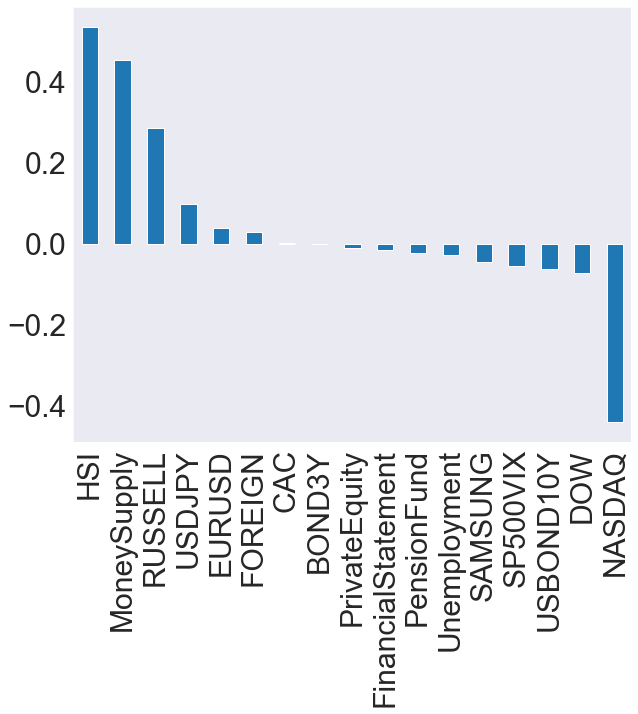

In [101]:
# LASSO를 통해 베타계수 0인 것이 제외된 FACTOR들
sns.set_style('dark')
coef = pd.Series(delete_zero, select_beta_name).sort_values(ascending = False)
coef.plot(kind = 'bar', figsize = (10,8));
plt.rcParams['font.size'] = 20

In [102]:
# beta 계수 높은 순서대로
coef_df = pd.DataFrame(coef)
coef_df.columns = ['estimated_beta']
coef_df

,estimated_beta
HSI,0.535227
MoneySupply,0.454177
RUSSELL,0.285801
USDJPY,0.097878
EURUSD,0.038608
FOREIGN,0.028969
CAC,0.001585
BOND3Y,-0.000932
PrivateEquity,-0.011559
FinancialStatement,-0.015885
